In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os
import glob
import keras

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD

In [2]:
# Load and build raw data structures
equImages = []
equLabels = []
equImagesPath = './testImages/class_a'
for img in os.listdir(equImagesPath):
    i = cv2.imread(equImagesPath + "/" + img)
    iGrey = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    iResized = cv2.resize(iGrey, (64,64))
    equImages.append(iResized)
    equLabels.append(0)    
equX = np.asarray(equImages).reshape((len(equImages), 64, 64, 1)) 
equY = np.asarray(equLabels)

noEquImages = []
noEquLabels = []
noEquImagesPath = './testImages/class_b'
for img in os.listdir(noEquImagesPath):
    i = cv2.imread(noEquImagesPath + "/" + img)
    iGrey = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    iResized = cv2.resize(iGrey, (64,64))
    noEquImages.append(iResized)
    noEquLabels.append(1)    
noEquX = np.asarray(noEquImages).reshape((len(noEquImages), 64, 64, 1)) 
noEquY = np.asarray(noEquLabels)

# Stack the training data 
X = np.vstack((equX, noEquX)) 
X = X/255.0
y = np.hstack((equY, noEquY))



In [3]:
# Check shapes
print(equX.shape)
print(equY.shape)
print(noEquX.shape)
print(noEquY.shape)
print(X.shape)
print(y.shape)

(38, 64, 64, 1)
(38,)
(20, 64, 64, 1)
(20,)
(58, 64, 64, 1)
(58,)


In [4]:
# Split training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

print("Training data:")
print(X_train.shape)
print(y_train.shape)
print("Test data:")
print(X_test.shape)
print(y_test.shape)



Training data:
(46, 64, 64, 1)
(46,)
Test data:
(12, 64, 64, 1)
(12,)


0


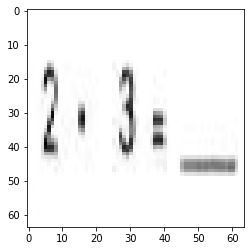

In [5]:
# Print random samples from training set
n = 20
plt.imshow(X_train[n], cmap='gray')
print(y_train[n])

1


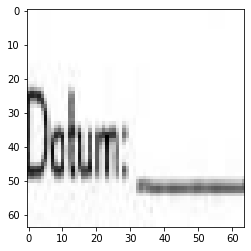

In [6]:
# Print random samples from test set
n = 2
plt.imshow(X_test[n], cmap='gray')
print(y_test[n])

In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(4,4)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(10, activation='relu'))
# output layer
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 10)        100       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2250)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                22510     
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 22,632
Trainable params: 22,632
Non-trainable params: 0
__________________________________________________

In [ ]:
# Build the model

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# hidden layer
model.add(Dense(10, activation='relu'))
# output layer
model.add(Dense(2, activation='softmax'))

model.summary()


In [ ]:
# Build the model

# Model architechture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.24))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.24))
model.add(Dense(2,activation='softmax'))

model.summary()

In [11]:
# Train the model 
#opt = SGD(lr=0.01)
opt = "adam"
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

datagen = ImageDataGenerator(
        rotation_range=3, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.1, # zoom
        horizontal_flip=False # horizontal flip
        #brightness_range=[0.2,1.2] # brightness
        )

history = model.fit(datagen.flow(X_train, y_train, batch_size=4),
          steps_per_epoch=len(X_train) / 4, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
11/11 [==============================] - 1s 19ms/step - loss: 0.7031 - accuracy: 0.6739 - val_loss: 0.6769 - val_accuracy: 0.5833
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6580 - accuracy: 0.6739 - val_loss: 0.6577 - val_accuracy: 0.5833
Epoch 3/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6198 - accuracy: 0.6739 - val_loss: 0.6648 - val_accuracy: 0.5833
Epoch 4/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6419 - accuracy: 0.6739 - val_loss: 0.6675 - val_accuracy: 0.5833
Epoch 5/300
11/11 [==============================] - 0s 11ms/step - loss: 0.6181 - accuracy: 0.6739 - val_loss: 0.6277 - val_accuracy: 0.5833
Epoch 6/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6077 - accuracy: 0.6739 - val_loss: 0.6213 - val_accuracy: 0.5833
Epoch 7/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6057 - accuracy: 0.6739 - val_loss: 0.6099 - val_accuracy: 0.5833
Epoch 8

11/11 [==============================] - 0s 10ms/step - loss: 0.3879 - accuracy: 0.8478 - val_loss: 0.2944 - val_accuracy: 0.9167
Epoch 59/300
11/11 [==============================] - 0s 8ms/step - loss: 0.3093 - accuracy: 0.8913 - val_loss: 0.2760 - val_accuracy: 0.9167
Epoch 60/300
11/11 [==============================] - 0s 8ms/step - loss: 0.4434 - accuracy: 0.8696 - val_loss: 0.2525 - val_accuracy: 0.9167
Epoch 61/300
11/11 [==============================] - 0s 8ms/step - loss: 0.3787 - accuracy: 0.8478 - val_loss: 0.2245 - val_accuracy: 1.0000
Epoch 62/300
11/11 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.8696 - val_loss: 0.2446 - val_accuracy: 0.9167
Epoch 63/300
11/11 [==============================] - 0s 8ms/step - loss: 0.3978 - accuracy: 0.8696 - val_loss: 0.2017 - val_accuracy: 1.0000
Epoch 64/300
11/11 [==============================] - 0s 8ms/step - loss: 0.4123 - accuracy: 0.8478 - val_loss: 0.2597 - val_accuracy: 0.9167
Epoch 65/300
11/11

11/11 [==============================] - 0s 11ms/step - loss: 0.2648 - accuracy: 0.8696 - val_loss: 0.1091 - val_accuracy: 1.0000
Epoch 116/300
11/11 [==============================] - 0s 8ms/step - loss: 0.2142 - accuracy: 0.9348 - val_loss: 0.1066 - val_accuracy: 1.0000
Epoch 117/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1904 - accuracy: 0.9783 - val_loss: 0.1251 - val_accuracy: 1.0000
Epoch 118/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1864 - accuracy: 0.9130 - val_loss: 0.1107 - val_accuracy: 1.0000
Epoch 119/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1774 - accuracy: 0.9565 - val_loss: 0.0994 - val_accuracy: 1.0000
Epoch 120/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1165 - accuracy: 0.9783 - val_loss: 0.1115 - val_accuracy: 1.0000
Epoch 121/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1464 - accuracy: 0.9783 - val_loss: 0.0889 - val_accuracy: 1.0000
Epoch 122/30

11/11 [==============================] - 0s 11ms/step - loss: 0.0984 - accuracy: 0.9783 - val_loss: 0.0748 - val_accuracy: 1.0000
Epoch 173/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1075 - accuracy: 0.9565 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 174/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1038 - accuracy: 0.9783 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 175/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1064 - accuracy: 0.9783 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 176/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0584 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 177/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0887 - accuracy: 0.9783 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 178/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1539 - accuracy: 0.9130 - val_loss: 0.0988 - val_accuracy: 0.9167
Epoch 179/30

11/11 [==============================] - 0s 11ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 230/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1198 - accuracy: 0.9565 - val_loss: 0.1407 - val_accuracy: 0.9167
Epoch 231/300
11/11 [==============================] - 0s 8ms/step - loss: 0.1021 - accuracy: 0.9783 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 232/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 1.0000
Epoch 233/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9167
Epoch 234/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 235/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 236/30

11/11 [==============================] - 0s 10ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 287/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 288/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 289/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0375 - accuracy: 0.9783 - val_loss: 0.1007 - val_accuracy: 0.9167
Epoch 290/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0709 - accuracy: 0.9783 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 291/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 292/300
11/11 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 293/30

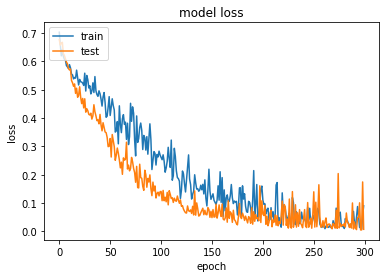

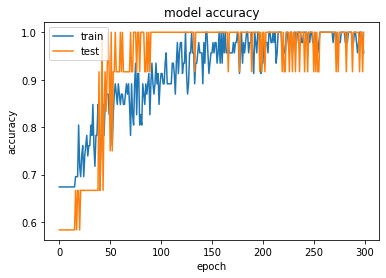

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

0
1/1 [==============================] - 0s 86ms/step
[[0.99611926 0.00388078]]


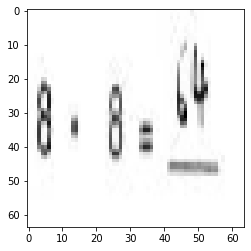

In [13]:
# Use the model to make predictions
n = 5
plt.imshow(X_train[n], cmap='gray')
print(y_train[n])
sample = X_train[n].reshape(1,64,64,1)

prediction = model.predict(sample)
print(prediction)

1
1/1 [==============================] - 0s 18ms/step
[[0.02173012 0.9782698 ]]


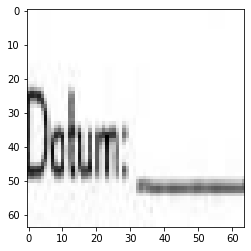

In [14]:

# Use the model to make predictions on the test test
n = 2
plt.imshow(X_test[n], cmap='gray')
print(y_test[n])
sample = X_test[n].reshape(1,64,64,1)

prediction = model.predict(sample)
print(prediction)